# 5_相関関係の確認
- 各データの間の関係性がどれくらい強いのかを定量的に確認します
- 例えば、年齢と生存には関係があると仮説を立てることができます（子供は優先的に助けられるといった想像がつく）が、これを定量的に「関係ありそう」「関係なさそう」と言えるのが相関関係分析の強みです

# （事前情報）ライブラリの説明：SciPy

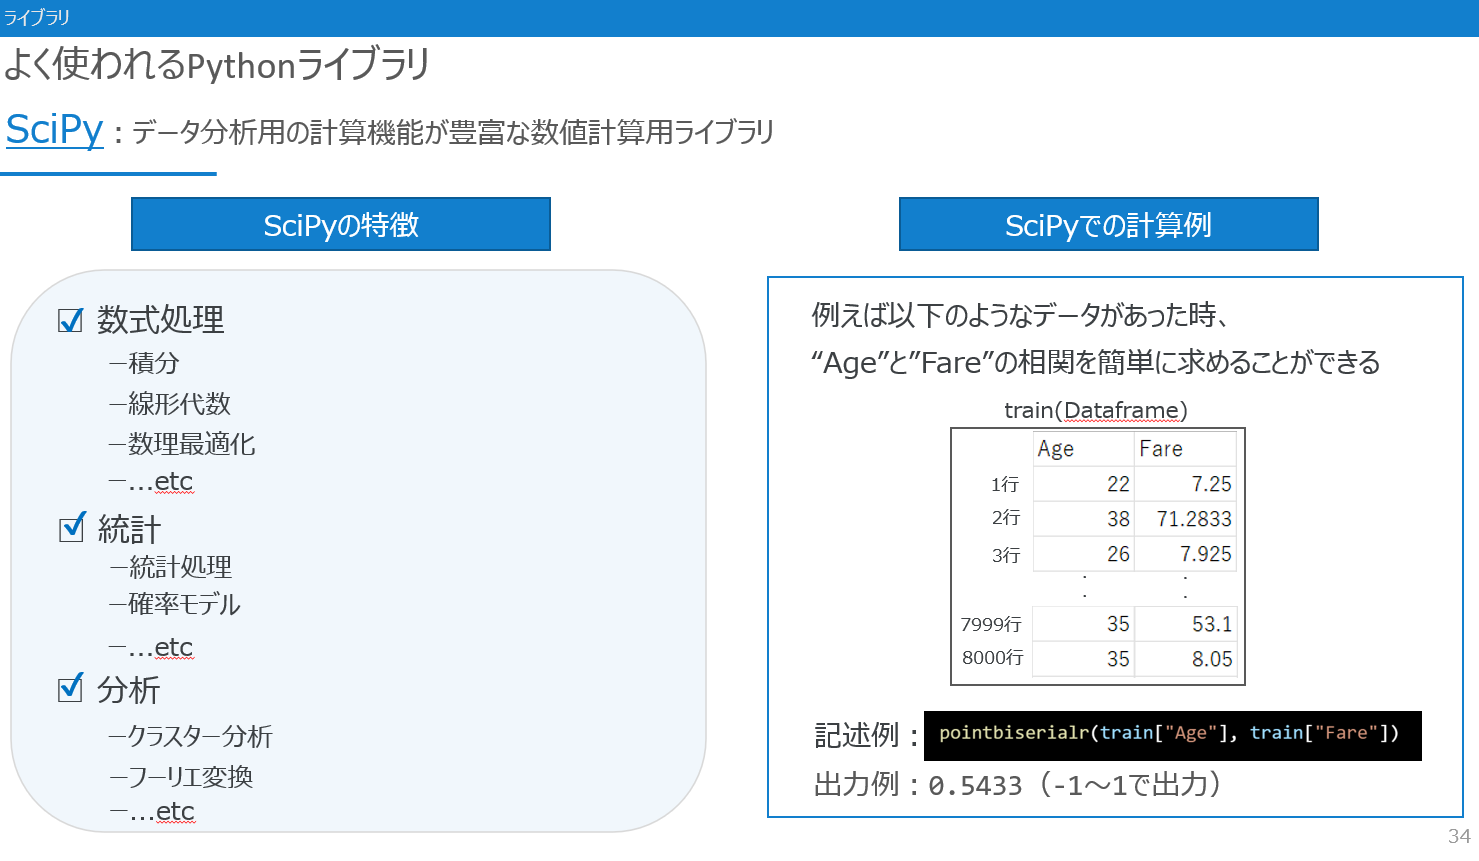

# （事前情報）ライブラリの説明：Seaborn

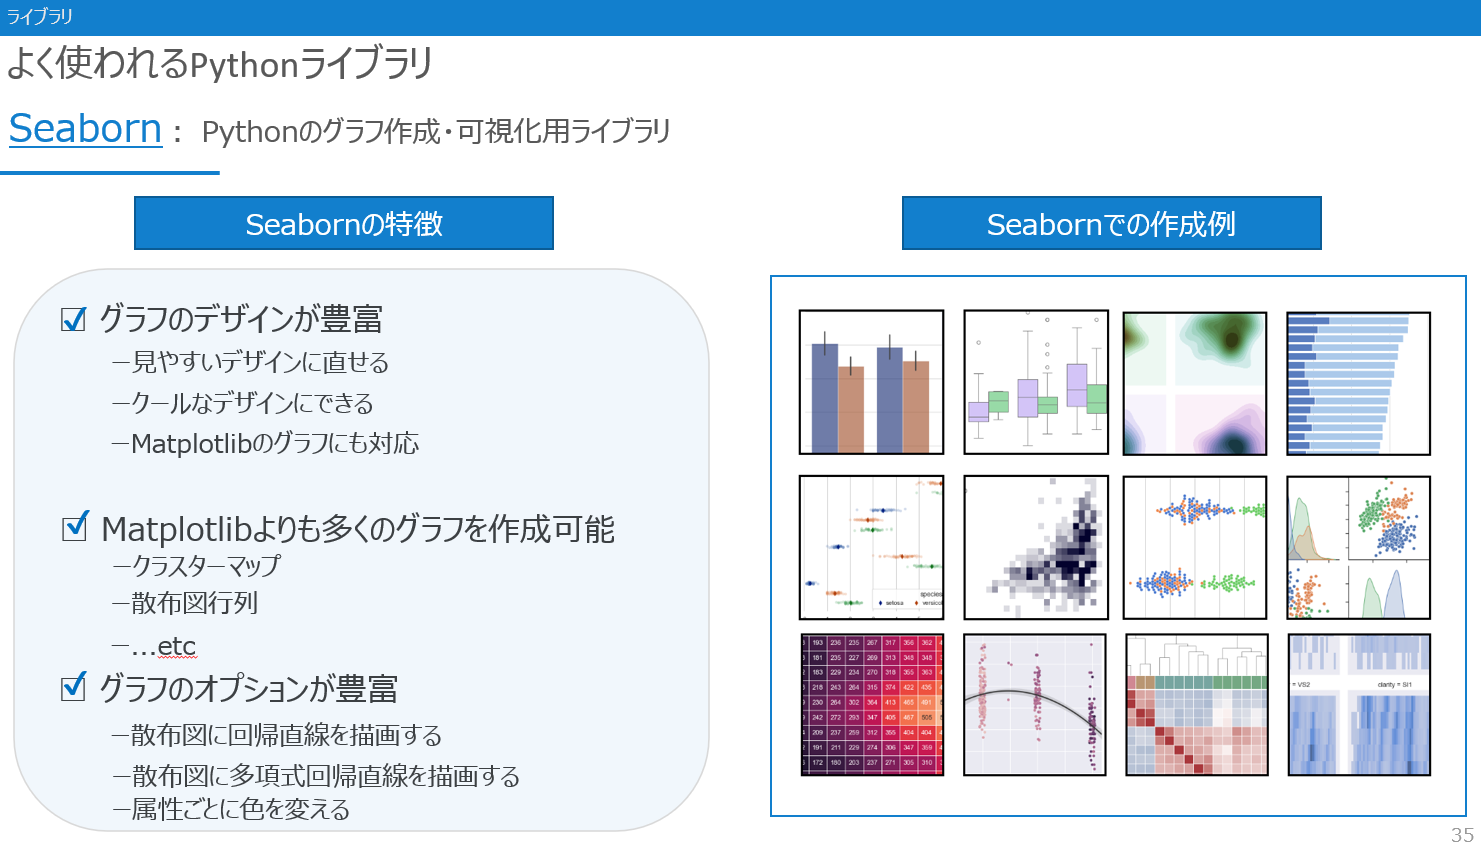

## ■写経

### ライブラリインストール
-相関を計算するために使うSciPyをインストールします  
-データ可視化のために使うseabornをインストールします

In [2]:
!pip install scipy
!pip install seaborn

### ライブラリインポート（PandasとSciPy）
- 表形式データを簡単に扱うためのPandasをプログラムにインポートします。インポートすることでPandasの機能が有効化されます
- また、相関を計算するためにSciPyライブラリの関数を用います
- matplotlibとseabornを可視化のためにインポートします

In [5]:
import pandas as pd
from scipy.stats import pointbiserialr  # SciPyの2値変数と連続変数間の相関を計算するためにpointbiserialrを用いる
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### データ読み込み（前章と同じ）
- Pandasの機能を使い、"train.csv"というデータをPythonコードで読み込み、Dataframeオブジェクトとして扱います

In [6]:
train = pd.read_csv("train.csv")

### データを見てみる（前章と同じ）
- head関数をつかって、先頭5行分のデータをダイジェスト表示します

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 年齢と生存の相関を確認する
- 年齢と生死には関係があるのか、定量的に確認します
- Point biserial相関では、相関係数が-1（完全な負の相関）から1（完全な正の相関）をとり、0の場合は相関なしを意味します
- Ageには欠損値があったため、前章の通りに平均値補完を行ってから相関を計算します

In [8]:
# Ageの欠損値補完
# まず、Ageの平均値を計算
age_mean = train["Age"].mean()
# 次にAgeの欠損値をage_meanにおきかえる
train["Age"].fillna(age_mean, inplace=True)
# isnull.anyでAgeを確認
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [3]:
# pointbiserialrで相関係数を計算-> 相関関係とp値を返す
corr_age, _ = pointbiserialr(train["Survived"], train["Age"])
print("Point Biserial Correlation:", corr_age)

NameError: name 'pointbiserialr' is not defined

↑0に近いため、単純な正or負の相関は認めにくい

### (上級者向け)　p値の解説
- *p値の理解には統計的検定の知識が求められ難易度が高いため、今回は無視しても大丈夫です。 
- 前提：pointbiserialrは2つのデータ列間の"相関係数"と"p値"を求める関数です。  
上記の記述では、corr_ageに相関係数を、"＿"にp値を代入しています。("_"に値を代入する＝値を使わない)  
 



- p値は、統計的な検定結果の信頼性を評価するための指標です。  
p-value が小さいほど、結果の信頼性が高いとされます。  
【p値の目安】  
p値 <  0.05　:統計的に有意な差や効果がある可能性が高い  
p値 >= 0.05 :統計的に有意な差や効果がない可能性が高い

下記で、念のため視覚的にも相関を確認してみる

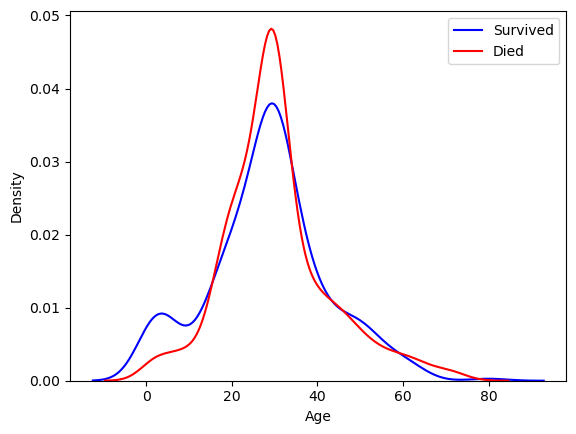

In [11]:
# 生存者と死者を分ける
survived = train[train['Survived']==1]
died = train[train['Survived']==0]

# KDE図をプロットする KDE = カーネル密度推定であり、ヒストグラムの滑らかなバージョンと思って良い
# 少し難易度が高いので無視してもよい
sns.kdeplot(data=survived['Age'].dropna(), color='b', label='Survived')
sns.kdeplot(data=died['Age'].dropna(), color='r', label='Died')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()

### 性別と生存の相関を確認する
- 性別によって生死の割合に違いはあるでしょうか？
- 相関分析は数値データに対してしか行えないため、male->0、female->1という置き換えをした上で分析します

In [12]:
# まずは"Sex"列のmaleを0、"female"を1として表現しなおした"Sex_bi"列を作成する
mapping_dict = {"male": 0, "female": 1}

#Sex_bi列を作成し、Sex列で文字列になっているのをmapping_dictを用いて変換した値を代入
train["Sex_bi"] = train["Sex"].map(mapping_dict)

In [19]:
# SurvivedとSex_bi列でPoint biserial相関を計算する
corr_sex, _ = pointbiserialr(train["Survived"], train["Sex_bi"])
#pointbiserialrは相関係数とp値を返すので、相関係数のみを表示するようにする
print("Point Biserial Correlation:", corr_sex)

Point Biserial Correlation: 0.5433513806577557


↑Sex_biとSurvivedに正の相関がみられた。すなわちSex_biとSurvivedに相関がことが認められることとなる。  
次に、Sex_biに含まれるmale:0、female:0それぞれでどの程度の相関があるかを調べてみる。

In [20]:
# 生存者の割合を計算する
survival_rate = train.groupby('Sex_bi')['Survived'].mean()
survival_rate

Sex_bi
0    0.188908
1    0.742038
Name: Survived, dtype: float64

上記の結果は、Sex_biが1（女性）であるとSurvivedが1（生存）である傾向が認められることとなる。  
念のため、視覚的にも表示する。

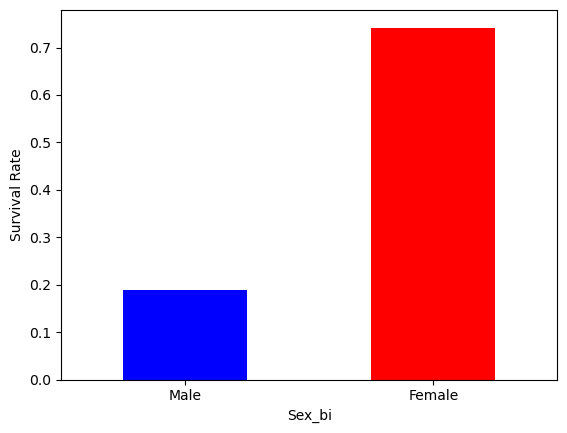

In [21]:
# 棒グラフを描画する
survival_rate.plot(kind='bar', color=['blue', 'red'])
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.show()